<a href="https://colab.research.google.com/github/pk142/DSML/blob/main/Aerolift_mill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("aerofit_treadmill.csv")

In [ ]:
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


In [ ]:
# Assuming you have a DataFrame 'df' with your data
summary_stats = df.groupby('Product').agg({'Age': ['mean', 'median', 'std'],
                                          'Income': ['mean', 'median', 'std'],
                                          'Miles': ['mean', 'median', 'std']})

print(summary_stats)

           Age                      Income                              Miles  \
          mean median       std       mean   median           std        mean   
Product                                                                         
KP281    28.55   26.0  7.221452  46418.025  46617.0   9075.783190   82.787500   
KP481    28.90   26.0  6.645248  48973.650  49459.5   8653.989388   87.933333   
KP781    29.10   27.0  6.971738  75441.575  76568.5  18505.836720  166.900000   

                           
        median        std  
Product                    
KP281     85.0  28.874102  
KP481     85.0  33.263135  
KP781    160.0  60.066544  


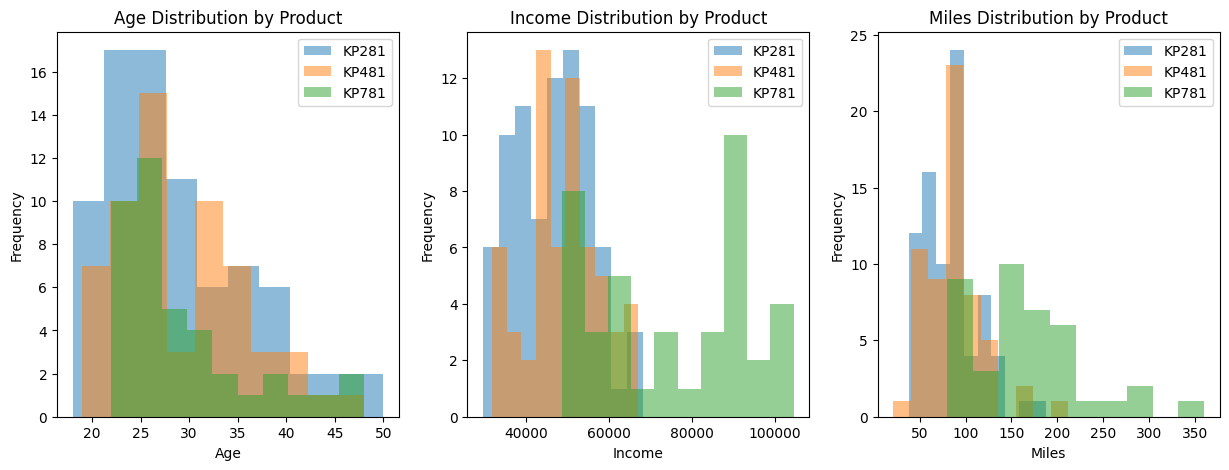

In [ ]:
# Plot histograms for age, income, and miles by product
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i, col in enumerate(['Age', 'Income', 'Miles']):
    for product, data in df.groupby('Product'):
        data[col].plot(kind='hist', alpha=0.5, ax=axes[i], label=product)
    axes[i].set_title(f'{col} Distribution by Product')
    axes[i].set_xlabel(col)
    axes[i].legend()

plt.show()


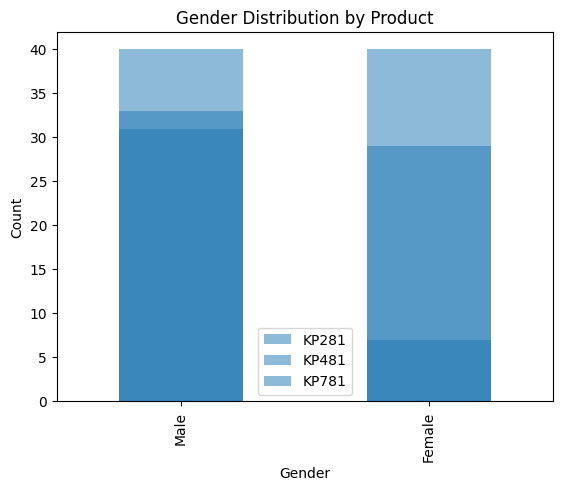

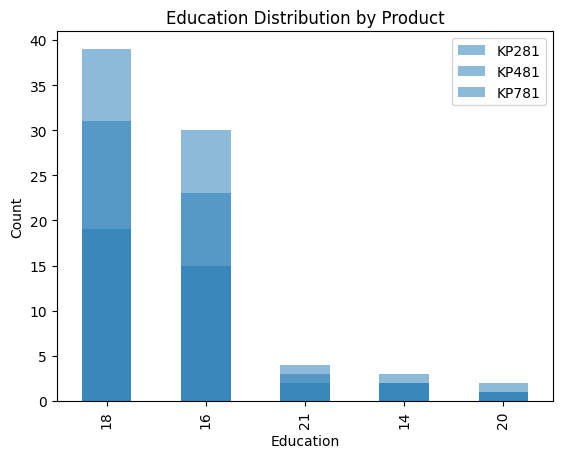

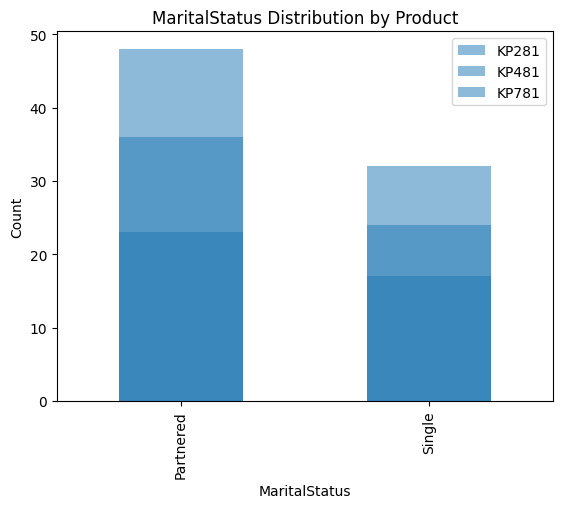

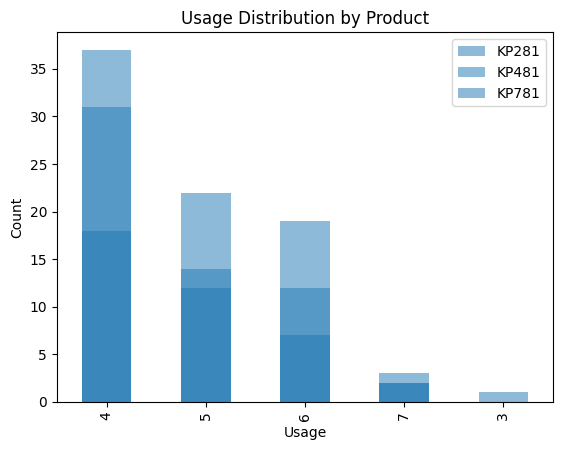

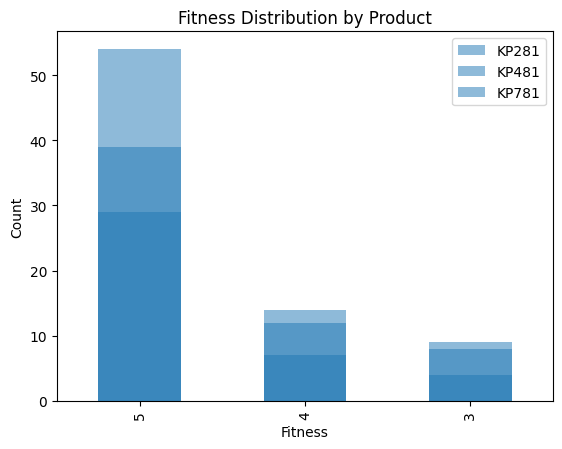

In [ ]:
# Plot bar charts for categorical variables (e.g., gender) by product
categorical_vars = ['Gender', 'Education', 'MaritalStatus', 'Usage', 'Fitness']

for var in categorical_vars:
    for product, data in df.groupby('Product'):
        data[var].value_counts().plot(kind='bar', alpha=0.5, label=product)
    plt.title(f'{var} Distribution by Product')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.legend()
    plt.show()


In [ ]:
# Create two-way contingency tables for Product and Gender
contingency_table = pd.crosstab(df['Product'], df['Gender'])

# Calculate conditional probabilities
conditional_probabilities = contingency_table.div(contingency_table.sum(1), axis=0)

# Calculate marginal probabilities
marginal_probabilities = contingency_table.div(contingency_table.sum(0), axis=1)

print("Contingency Table:\n", contingency_table)
print("\nConditional Probabilities:\n", conditional_probabilities)
print("\nMarginal Probabilities:\n", marginal_probabilities)


Contingency Table:
 Gender   Female  Male
Product              
KP281        40    40
KP481        29    31
KP781         7    33

Conditional Probabilities:
 Gender     Female      Male
Product                    
KP281    0.500000  0.500000
KP481    0.483333  0.516667
KP781    0.175000  0.825000

Marginal Probabilities:
 Gender     Female      Male
Product                    
KP281    0.526316  0.384615
KP481    0.381579  0.298077
KP781    0.092105  0.317308


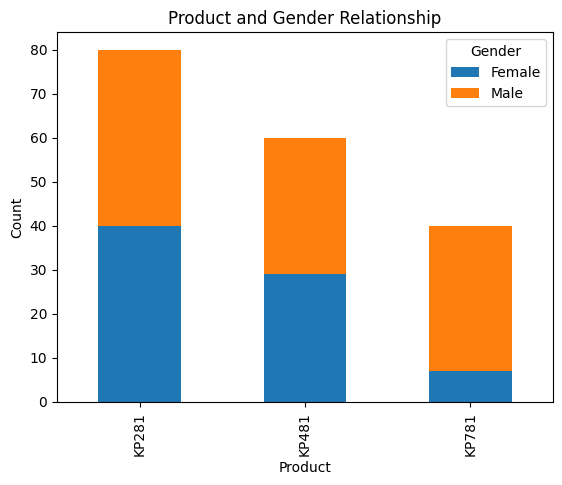

In [ ]:
# Stacked bar chart for Product and Gender
contingency_table.plot(kind='bar', stacked=True)
plt.title('Product and Gender Relationship')
plt.xlabel('Product')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


#Customer Profiles:

##Product KP281:
*   Age: The average age of customers for Product KP281 is 28.55 years,
with a median age of 26 years. The standard deviation is 7.22 years.
*   Income: Customers have an average income of approximately $46,418, with a median income of $46,617. The income standard deviation is approximately $9,075.
*   Miles Run: On average, customers run 82.79 miles, with a median of 85 miles. The standard deviation is approximately 28.87 miles.

##Product KP481:
*  Age: The average age of customers for Product KP481 is 28.90 years, with a median age of 26 years. The standard deviation is 6.65 years.
*   Income: Customers have an average income of approximately $48,973, with a median income of $49,459. The income standard deviation is approximately $8,653.
*  Miles Run: On average, customers run 87.93 miles, with a median of 85 miles. The standard deviation is approximately 33.26 miles.

##Product KP781:
*   Age: The average age of customers for Product KP781 is 29.10 years, with a median age of 27 years. The standard deviation is 6.97 years.
*   Income: Customers have a significantly higher average income of approximately $75,441, with a median income of $76,568.5. The income standard deviation is relatively high at approximately $18,505.84.
*   Miles Run: On average, customers run 166.90 miles, with a median of 160 miles. The standard deviation is approximately 60.07 miles.


#Gender Distribution:
*   Product KP281: The gender distribution for Product KP281 is almost equal, with 40 females and 40 males.

*   Product KP481: Product KP481 has a slightly more male-dominated customer base, with 31 males and 29 females.
*   Product KP781: Product KP781 is significantly more popular among males, with 33 males and only 7 females.


#Conditional Probabilities:
Conditional probabilities provide insights into the likelihood of a certain gender given the product purchased.
*  Product KP281: The likelihood of both females and males purchasing this product is relatively balanced (0.50 for both genders).
*   Product KP481: A slightly higher proportion of males (0.52) purchase this product compared to females (0.48).
*  Product KP781: This product is predominantly favored by males (0.83) and less so by females (0.17).


#Marginal Probabilities:
*  Marginal probabilities show the overall distribution of each gender and the overall distribution of products.
*   For all three products, males are the more dominant customer group. Product KP781 has the highest proportion of male customers.
*  Among all products, Product KP281 has a relatively balanced gender distribution compared to the others.


#Summary of Insights:
*   Product KP781 stands out as the premium product with significantly higher average income and a greater focus on male customers who run more miles.
*   Product KP481 has a slightly higher preference among males, while Product KP281 has a more balanced gender distribution.

These insights can help in tailoring marketing strategies and product recommendations to target specific customer segments for each product, and to potentially adjust marketing and product development strategies to better cater to the dominant customer groups.


